#### Small Find Diff example

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See http://

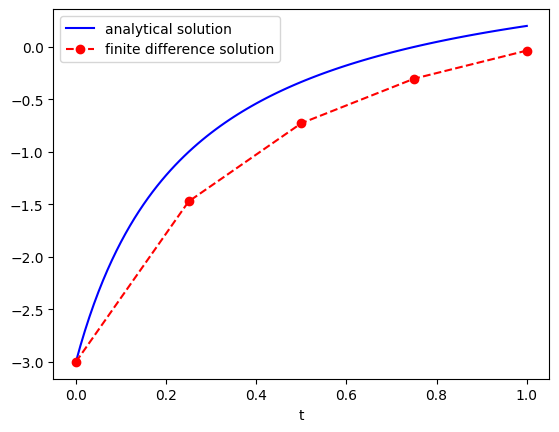

In [1]:
import pyomo.environ as pyo

numpoints = 5
model = m = pyo.ConcreteModel()
m.points = pyo.RangeSet(0,numpoints-1)
m.h = pyo.Param(initialize=1.0/(numpoints-1))

m.z = pyo.Var(m.points)
m.dzdt = pyo.Var(m.points)

m.obj = pyo.Objective(expr=1) # Dummy Objective

def _zdot(m, i):
    return m.dzdt[i] == m.z[i]**2 - 2*m.z[i] +1
m.zdot = pyo.Constraint(m.points,rule=_zdot)

def _back_diff(m,i):
    if i == 0:
        return pyo.Constraint.Skip
    return m.dzdt[i] == (m.z[i]-m.z[i-1])/m.h
m.back_diff = pyo.Constraint(m.points,rule=_back_diff)

def _init_con(m):
    return m.z[0] == -3
m.init_con = pyo.Constraint(rule=_init_con)

solver = pyo.SolverFactory('ipopt')
solver.solve(m,tee=True)

import matplotlib.pyplot as plt

analytical_t = [0.01*i for i in range(0,101)]
analytical_z = [(4*t-3)/(4*t+1) for t in analytical_t]

findiff_t = [m.h*i for i in m.points]
findiff_z = [pyo.value(m.z[i]) for i in m.points]

plt.plot(analytical_t,analytical_z,'b',label='analytical solution')
plt.plot(findiff_t,findiff_z,'ro--',label='finite difference solution')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()
